# My Vivino
<a href="https://medium.com/@temirovshermukhammad/my-vivino-13a81253239a">My blog post</a> <br>
<a href="https://www.canva.com/design/DAFiZPNztHg/QsIiAMM02PF1lY3GhyTh-w/view?utm_content=DAFiZPNztHg&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">My presentation</a>

In [2]:
# ! pip install numpy
# ! pip install pandas
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import seaborn as sns
import pickle

## Data Collecting / Cleaning

In [6]:
def load_dataset(file_name):
    dataset = pd.read_csv(file_name)

    columns = list(dataset.columns)
    price = columns.pop(6)
    columns.append(price)
    return dataset[columns]

In [7]:
dataset = load_dataset("vivino_top_ten.csv")
dataset.head()

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Region,Primary_Grape,Natural,Country,Style,Country_Code,Price
0,Baron de Ley,2020,8729994,Rosado de Lágrima 2020,4.2,42,La Rioja,Malbec,False,Argentina,Rose,ARG,7.15
1,New Age,N.V.,7704484,Sweet White N.V.,3.9,5672,Mendoza,Malbec,False,Argentina,White,ARG,7.43
2,Alamos,2018,68764,Malbec Rosé 2018,3.9,384,Valle de Uco,Malbec,False,Argentina,Rose,ARG,8.00
3,Alamos,2019,2166,Torrontes 2019,3.8,820,Salta,Malbec,False,Argentina,White,ARG,8.00
4,Alamos,2020,1387085,Cabernet Sauvignon 2020,3.6,489,Mendoza,Malbec,False,Argentina,Red,ARG,8.00


In [8]:
dataset.isna().sum()

Winery            0
Year             15
Wine_ID           0
Wine              0
Rating            0
Reviews           0
Region            0
Primary_Grape     0
Natural           0
Country           0
Style             0
Country_Code      0
Price             0
dtype: int64

In [9]:
def clean_dataset(dataset):
    dataset['Year'] = dataset['Year'].str.replace('N.V.', '2021',  regex = True)
    dataset.dropna(inplace = True)
    dataset['Year'] = dataset['Year'].astype(int)
    
    return dataset

In [10]:
dataset = clean_dataset(dataset)
dataset.head()

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Region,Primary_Grape,Natural,Country,Style,Country_Code,Price
0,Baron de Ley,2020,8729994,Rosado de Lágrima 2020,4.2,42,La Rioja,Malbec,False,Argentina,Rose,ARG,7.15
1,New Age,2021,7704484,Sweet White N.V.,3.9,5672,Mendoza,Malbec,False,Argentina,White,ARG,7.43
2,Alamos,2018,68764,Malbec Rosé 2018,3.9,384,Valle de Uco,Malbec,False,Argentina,Rose,ARG,8.00
3,Alamos,2019,2166,Torrontes 2019,3.8,820,Salta,Malbec,False,Argentina,White,ARG,8.00
4,Alamos,2020,1387085,Cabernet Sauvignon 2020,3.6,489,Mendoza,Malbec,False,Argentina,Red,ARG,8.00


In [11]:
dataset.isna().sum()

Winery           0
Year             0
Wine_ID          0
Wine             0
Rating           0
Reviews          0
Region           0
Primary_Grape    0
Natural          0
Country          0
Style            0
Country_Code     0
Price            0
dtype: int64

In [12]:
def encoder(dataset):
    encoder = LabelEncoder()
    columns = list(dataset.columns)
    
    for column in columns:
        if dataset[column].dtype != int:
            print(f"{column} column is encoding ...")
            new_column = encoder.fit(dataset[column])
            dataset[column] = new_column.transform(dataset[column])
    return dataset

In [13]:
dataset = encoder(dataset.copy())

Winery column is encoding ...
Wine column is encoding ...
Rating column is encoding ...
Region column is encoding ...
Primary_Grape column is encoding ...
Natural column is encoding ...
Country column is encoding ...
Style column is encoding ...
Country_Code column is encoding ...
Price column is encoding ...


In [14]:
dataset.head()

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Region,Primary_Grape,Natural,Country,Style,Country_Code,Price
0,268,2020,8729994,7595,19,42,392,1,0,0,3,0,320
1,2586,2021,7704484,8534,16,5672,445,1,0,0,5,0,346
2,53,2018,68764,5322,16,384,752,1,0,0,3,0,400
3,53,2019,2166,9029,15,820,645,1,0,0,5,0,400
4,53,2020,1387085,1437,13,489,445,1,0,0,2,0,400


## Data Exploring

In [15]:
def summrize_dataset(dataset):
    print(f"Dataset shape : {dataset.shape[0]}, {dataset.shape[1]}\n\n")
    
    print("Firs 10 rows:")
    display(dataset.head(10))
    
    print("describe the data:")
    display(dataset.describe())

In [16]:
summrize_dataset(dataset)

Dataset shape : 12190, 13


Firs 10 rows:


,Winery,Year,Wine_ID,Wine,Rating,Reviews,Region,Primary_Grape,Natural,Country,Style,Country_Code,Price
0,268,2020,8729994,7595,19,42,392,1,0,0,3,0,320
1,2586,2021,7704484,8534,16,5672,445,1,0,0,5,0,346
2,53,2018,68764,5322,16,384,752,1,0,0,3,0,400
3,53,2019,2166,9029,15,820,645,1,0,0,5,0,400
4,53,2020,1387085,1437,13,489,445,1,0,0,2,0,400
5,53,2020,69694,1836,14,851,445,1,0,0,5,0,400
6,53,2020,1879,5310,15,3153,445,1,0,0,2,0,400
7,122,2020,1177446,1044,15,501,645,1,0,0,5,0,448
8,53,2019,2162,1126,15,1147,445,1,0,0,2,0,451
9,369,2019,1233100,306,13,149,752,1,0,0,5,0,482


describe the data:


,Winery,Year,Wine_ID,Wine,Rating,Reviews,Region,Primary_Grape,Natural,Country,Style,Country_Code,Price
count,12190.000000,12190.000000,1.219000e+04,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000,12190.000000
mean,1951.906973,2016.783511,2.122979e+06,5056.165135,16.200738,489.922806,452.615340,3.424446,0.039705,5.348646,2.962920,5.409270,1261.170550
std,1086.320875,4.847275,2.068808e+06,2928.460156,3.223379,2303.020519,239.411155,2.482822,0.195272,2.325725,1.443361,2.289047,901.878771
min,0.000000,1900.000000,5.310000e+02,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1094.000000,2016.000000,1.135145e+06,2381.250000,14.000000,55.000000,260.000000,2.000000,0.000000,3.000000,2.000000,4.000000,488.000000
50%,1994.500000,2018.000000,1.425654e+06,5162.500000,16.000000,122.000000,508.000000,3.000000,0.000000,5.000000,2.000000,5.000000,1037.000000
75%,2895.000000,2019.000000,2.489780e+06,7629.000000,18.000000,328.000000,671.000000,6.000000,0.000000,7.000000,5.000000,7.000000,1847.000000
max,3800.000000,2021.000000,1.020577e+07,10029.000000,26.000000,114425.000000,838.000000,7.000000,1.000000,9.000000,5.000000,9.000000,3545.000000


In [15]:
def print_correlation(dataset):
    corr = dataset.corr()
    data = pd.DataFrame({'Columns' : corr['Price'].index, 'correlation' : corr['Price'].values})
    display(data)

In [16]:
print_correlation(dataset)

,Columns,correlation
0,Winery,0.028849
1,Year,-0.421242
2,Wine_ID,-0.149412
3,Wine,-0.034154
4,Rating,0.769657
5,Reviews,0.019930
6,Region,-0.029565
7,Primary_Grape,-0.316790
8,Natural,0.058561
9,Country,-0.225728


## Data Visualization

In [27]:
def print_histograms(dataset):
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dataset.hist(figsize = (20, 20), bins = 20)

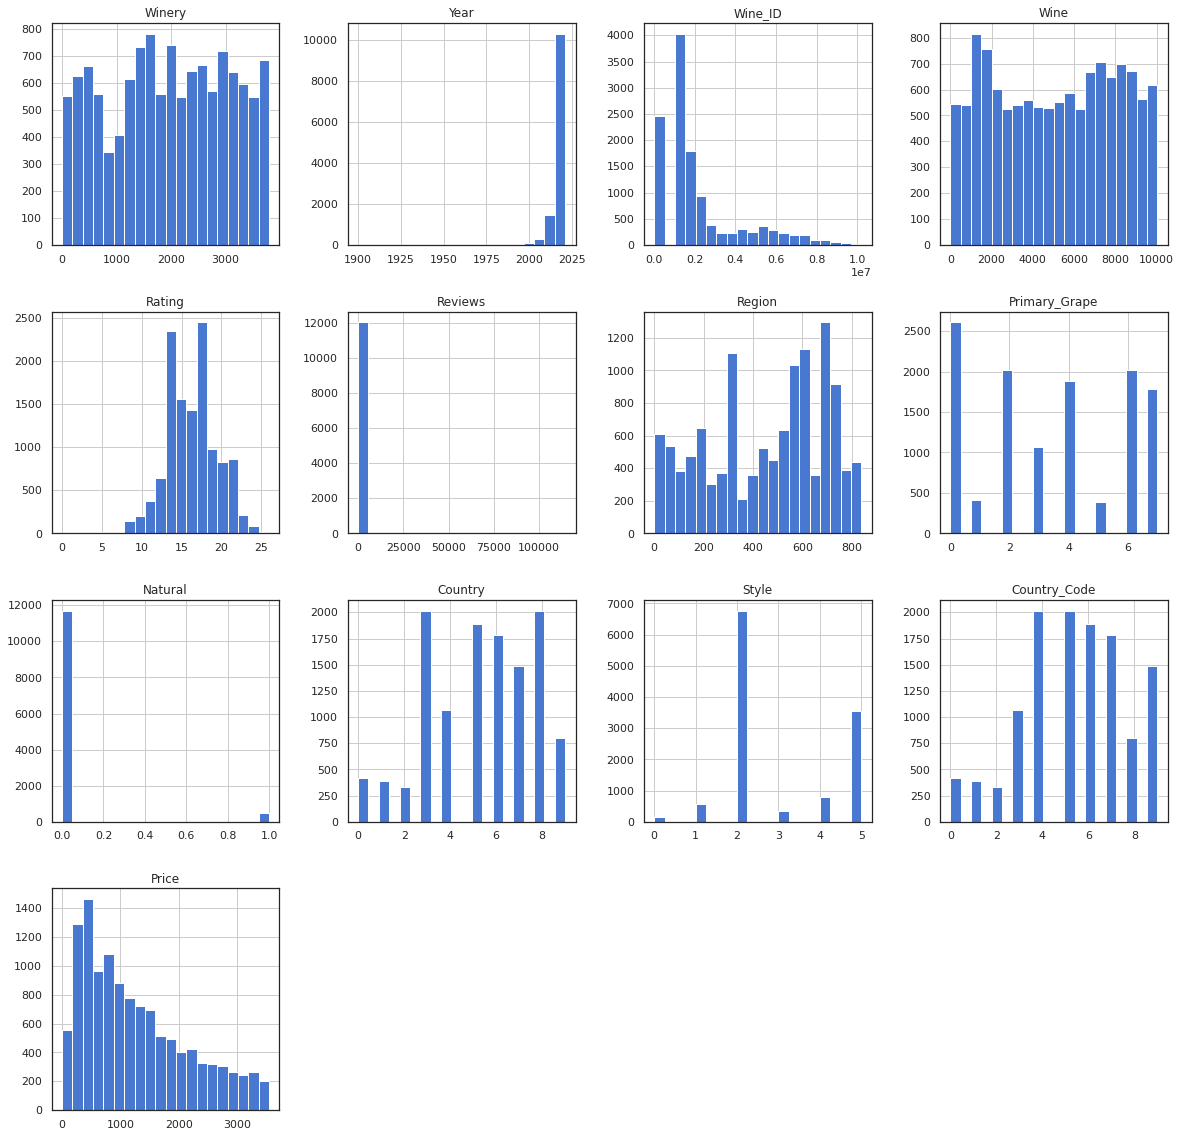

In [28]:
print_histograms(dataset)

In [29]:
def heat_map(dataset):
  plt.figure(figsize=(20,10))
  sns.heatmap(dataset.corr(), annot=True).set_title('Correlation Matrix')
  plt.show()

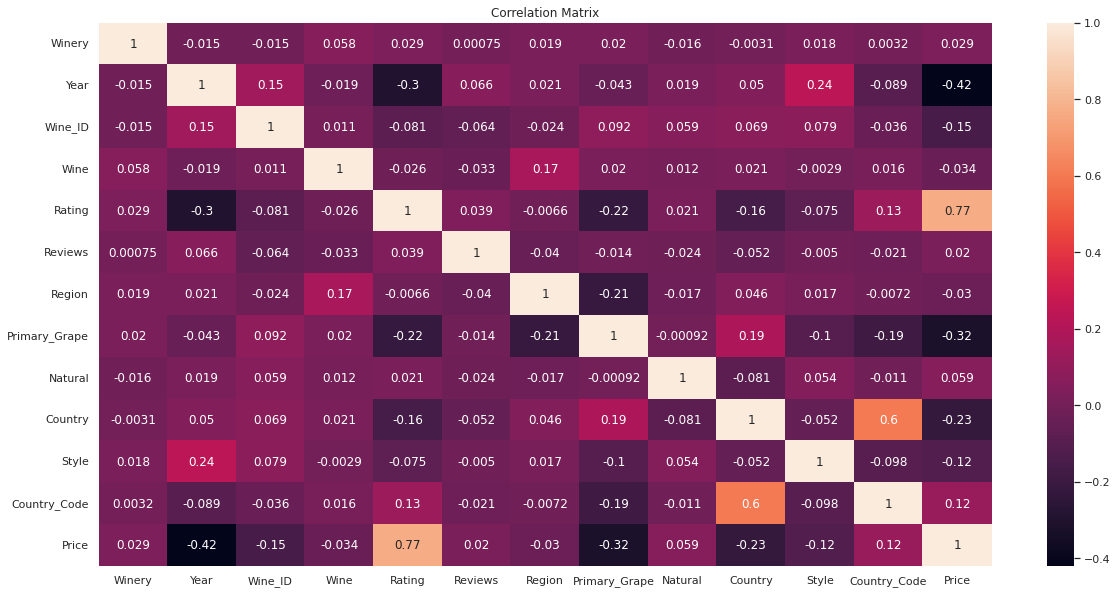

In [30]:
heat_map(dataset)

In [31]:
def print_pairplot(dataset):
    sns.pairplot(dataset[['Style','Price','Natural','Year','Reviews','Rating']])
    plt.show()

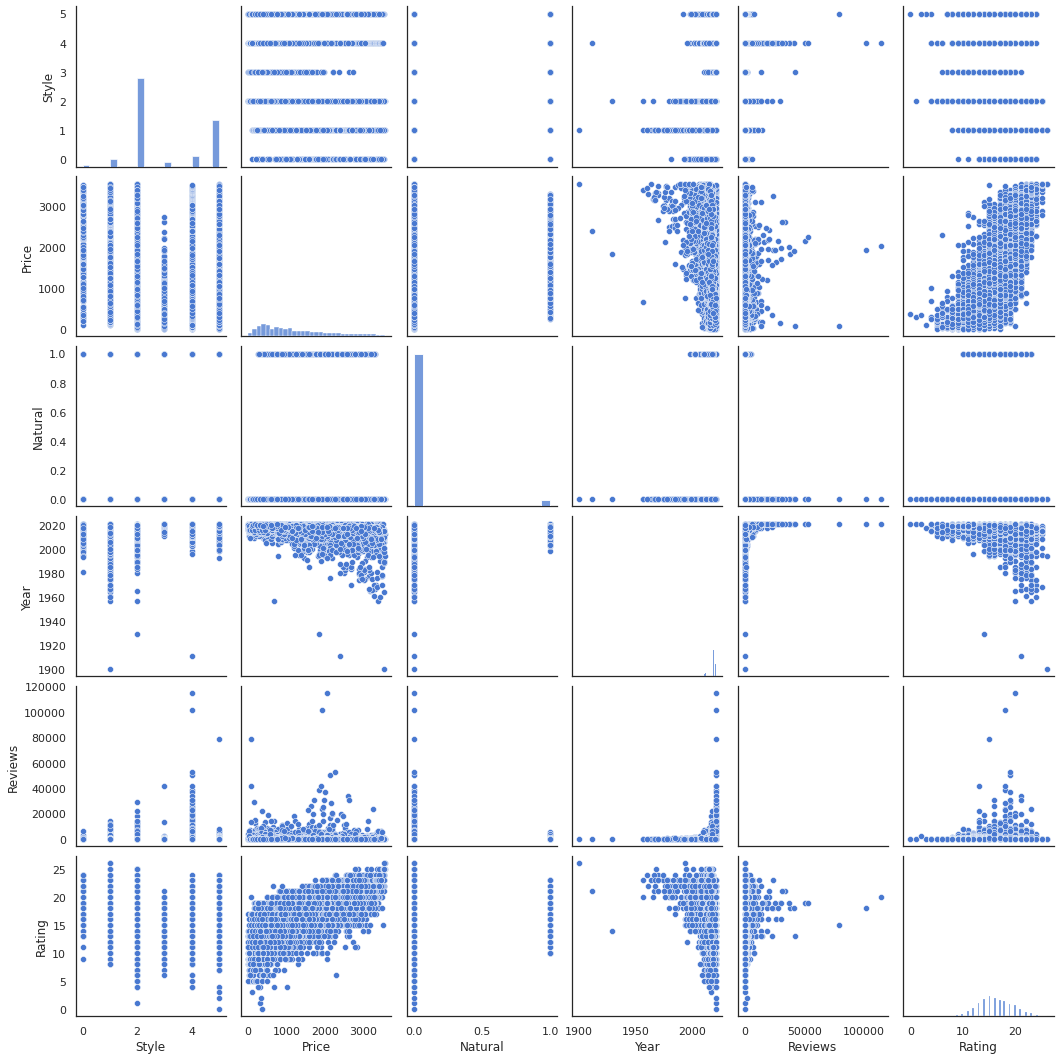

In [32]:
print_pairplot(dataset)

In [33]:
dataset

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Region,Primary_Grape,Natural,Country,Style,Country_Code,Price
0,268,2020,8729994,7595,19,42,392,1,0,0,3,0,320
1,2586,2021,7704484,8534,16,5672,445,1,0,0,5,0,346
2,53,2018,68764,5322,16,384,752,1,0,0,3,0,400
3,53,2019,2166,9029,15,820,645,1,0,0,5,0,400
4,53,2020,1387085,1437,13,489,445,1,0,0,2,0,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,1755,2017,1170241,8816,13,199,693,0,0,7,2,9,625
12201,2274,2019,1176448,8894,11,107,820,0,0,7,5,9,390
12202,3302,2021,1192074,5137,20,323,606,0,0,7,5,9,752
12203,2438,2017,19306,1434,18,178,693,0,0,7,2,9,1293


# Machine Learning

<h1 style="color: green;">Pic a model/estimator (to suit your problem) </h1>

<a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">
  <img src='https://drive.google.com/uc?id=1eCMuT8gRPdYOp4XeSwqMLkkhZgYvoiJ7'>
</a>

In [17]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Fit the models

In [18]:
def fit_models(X, Y, models = [GradientBoostingRegressor(), LinearRegression()]):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
    trained_model = {}
    
    for model in models:
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        trained_model[f"{model}"] = {'model' : model, 'r2_score' : int(r2_score(y_test, y_predict) * 100)}

        print(f"{model} score is {int(r2_score(y_test, y_predict) * 100)}%")
    return trained_model

In [22]:
models = [GradientBoostingRegressor(),
          RandomForestRegressor(),
          LinearRegression(), ElasticNet(), 
          DecisionTreeRegressor(), 
          KNeighborsRegressor()]

In [23]:
X = dataset[['Rating', 'Year','Style', 'Wine','Natural', 'Region', 'Country']]
Y = dataset['Price']
models = fit_models(X, Y, models = models)

GradientBoostingRegressor() score is 80%
RandomForestRegressor() score is 80%
LinearRegression() score is 64%
ElasticNet() score is 64%
DecisionTreeRegressor() score is 64%
KNeighborsRegressor() score is 37%


In [24]:
models

{'GradientBoostingRegressor()': {'model': GradientBoostingRegressor(),
  'r2_score': 80},
 'RandomForestRegressor()': {'model': RandomForestRegressor(), 'r2_score': 80},
 'LinearRegression()': {'model': LinearRegression(), 'r2_score': 64},
 'ElasticNet()': {'model': ElasticNet(), 'r2_score': 64},
 'DecisionTreeRegressor()': {'model': DecisionTreeRegressor(), 'r2_score': 64},
 'KNeighborsRegressor()': {'model': KNeighborsRegressor(), 'r2_score': 37}}

# Save models

In [25]:
models

{'GradientBoostingRegressor()': {'model': GradientBoostingRegressor(),
  'r2_score': 80},
 'RandomForestRegressor()': {'model': RandomForestRegressor(), 'r2_score': 80},
 'LinearRegression()': {'model': LinearRegression(), 'r2_score': 64},
 'ElasticNet()': {'model': ElasticNet(), 'r2_score': 64},
 'DecisionTreeRegressor()': {'model': DecisionTreeRegressor(), 'r2_score': 64},
 'KNeighborsRegressor()': {'model': KNeighborsRegressor(), 'r2_score': 37}}

In [26]:
def save_models(models, save_models = ['GradientBoostingRegressor()']):
    for model_name in save_models:
        save_model = models[model_name]['model']
        pickle.dump(save_model, open(model_name[:-2], 'wb'))
        print(f"Model '{model_name[:-2]}' successfully saved ...")

In [27]:
save_models(models, save_models = ['GradientBoostingRegressor()', 'RandomForestRegressor()'])

Model 'GradientBoostingRegressor' successfully saved ...
Model 'RandomForestRegressor' successfully saved ...


# Load model

In [28]:
def load_model(model_name):
    return pickle.load(open(model_name, 'rb'))

In [29]:
model = load_model('GradientBoostingRegressor')
model

GradientBoostingRegressor()